<a href="https://colab.research.google.com/github/samyumobi/ATM-TRANSACTIONS-THROUGH-BIOMETRIC-MODE/blob/master/Copy_of_8A_LR_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, Normalizer
import matplotlib.pyplot as plt
from sklearn.svm import SVC
import warnings
warnings.filterwarnings("ignore")

In [3]:
def draw_line(coef,intercept, mi, ma):
    # for the separating hyper plane ax+by+c=0, the weights are [a, b] and the intercept is c
    # to draw the hyper plane we are creating two points
    # 1. ((b*min-c)/a, min) i.e ax+by+c=0 ==> ax = (-by-c) ==> x = (-by-c)/a here in place of y we are keeping the minimum value of y
    # 2. ((b*max-c)/a, max) i.e ax+by+c=0 ==> ax = (-by-c) ==> x = (-by-c)/a here in place of y we are keeping the maximum value of y
    points=np.array([[((-coef[1]*mi - intercept)/coef[0]), mi],[((-coef[1]*ma - intercept)/coef[0]), ma]])
    plt.plot(points[:,0], points[:,1])

# What if Data is imabalanced

<pre>
1. As a part of this task you will observe how linear models work in case of data imbalanced
2. observe how hyper plane is changs according to change in your learning rate.
3. below we have created 4 random datasets which are linearly separable and having class imbalance
4. in the first dataset the ratio between positive and negative is 100 : 2, in the 2nd data its 100:20, 
in the 3rd data its 100:40 and in 4th one its 100:80
</pre>

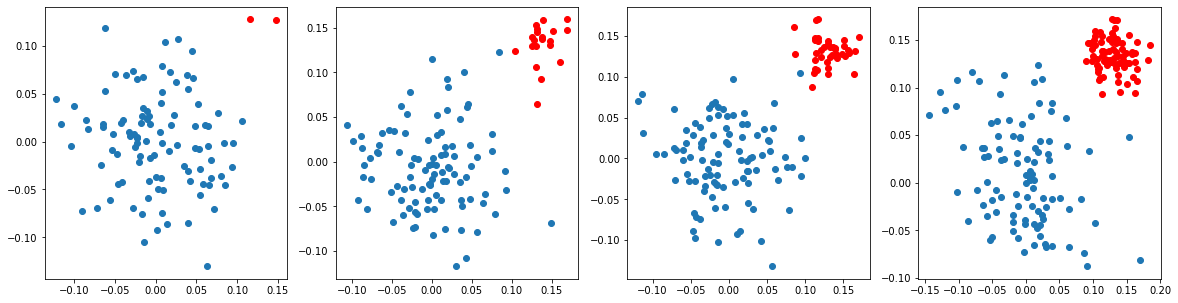

In [4]:
# here we are creating 2d imbalanced data points 
ratios = [(100,2), (100, 20), (100, 40), (100, 80)]
plt.figure(figsize=(20,5))
for j,i in enumerate(ratios):
    plt.subplot(1, 4, j+1)
    X_p=np.random.normal(0,0.05,size=(i[0],2))
    X_n=np.random.normal(0.13,0.02,size=(i[1],2))
    y_p=np.array([1]*i[0]).reshape(-1,1)
    y_n=np.array([0]*i[1]).reshape(-1,1)
    X=np.vstack((X_p,X_n))
    y=np.vstack((y_p,y_n))
    plt.scatter(X_p[:,0],X_p[:,1])
    plt.scatter(X_n[:,0],X_n[:,1],color='red')
plt.show()

> your task is to apply SVM (<a href='https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC'>sklearn.svm.SVC</a>) and LR (<a href='https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html'>sklearn.linear_model.LogisticRegression</a>) with different regularization strength [0.001, 1, 100]

## Task 1: Applying SVM

<pre>1. you need to create a grid of plots like this</pre>
<img src='https://i.imgur.com/TOmRwL3.png'> 
<pre>
in each of the cell[i][j] you will be drawing the hyper plane that you get after applying <a href="https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html">SVM</a> on ith dataset and 
        jth learnig rate 

i.e 
<table>
    <tr><td>Plane(SVM().fit(D1, C=0.001))</td><td>Plane(SVM().fit(D1, C=1))</td><td>Plane(SVM().fit(D1, C=100))</td></tr>
    <tr><td>Plane(SVM().fit(D2, C=0.001))</td><td>Plane(SVM().fit(D2, C=1))</td><td>Plane(SVM().fit(D2, C=100))</td></tr>
    <tr><td>Plane(SVM().fit(D3, C=0.001))</td><td>Plane(SVM().fit(D3, C=1))</td><td>Plane(SVM().fit(D3, C=100))</td></tr>
    <tr><td>Plane(SVM().fit(D4, C=0.001))</td><td>Plane(SVM().fit(D4, C=1))</td><td>Plane(SVM().fit(D4, C=100))</td></tr>
</table>

if you can do, you can represent the support vectors in different colors, 
which will help us understand the position of hyper plane 


<font color='red'> <h3> Write in your own words, the observations from the above plots, and 
what do you think about the position of the hyper plane </h3> </font>

check the optimization problem here https://scikit-learn.org/stable/modules/svm.html#mathematical-formulation

if you can describe your understanding by writing it on a paper 
and attach the picture, or record a video upload it in assignment. 
</pre>

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm,datasets


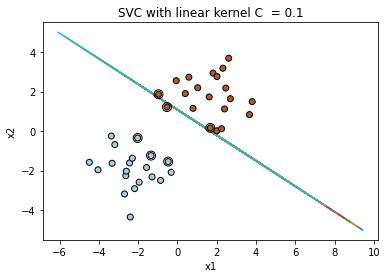

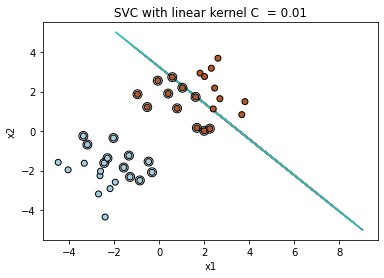

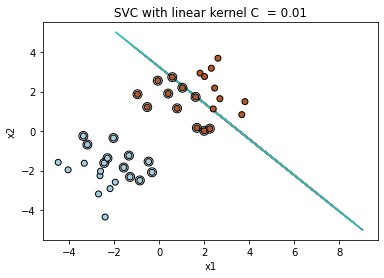

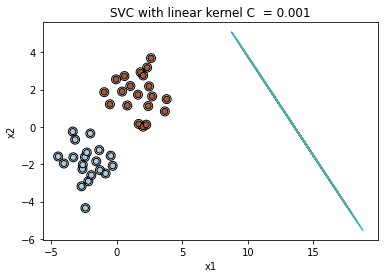

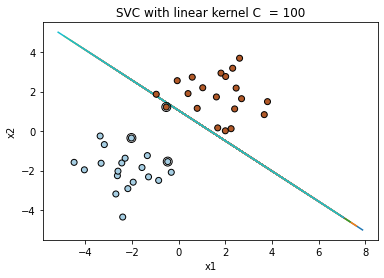

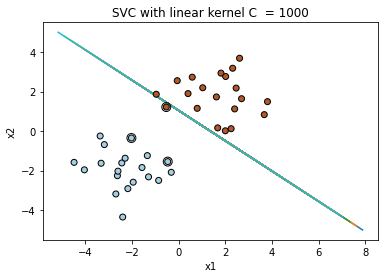

In [42]:
# random distribution of 40 points
X = np.r_[np.random.randn(20,2) - [2,2],np.random.randn(20,2) + [2,2]]
Y = [0] * 20 + [1] * 20

k = ['linear']
C = [0.1,0.01,0.01,0.001,100,1000]
for i in k:
  for j in C:

    # fit the model
    clf = svm.SVC(kernel = i, C = j)
    clf.fit(X, Y)

    # hyper plane 
    w = clf.coef_[0]
    a = -w[0]/w[1]
    xx = np.linspace(-5,5)
    yy = a * xx - (clf.intercept_[0])/w[1]

    # margin = 1/np.sqrt(np.sum(clf.coef_**2))
    # yy_down = yy - np.sqrt(1 + a ** 2) * margin
    # yy_up = yy + np.sqrt(1 + a ** 2) * margin
    # plt.figure(1, figsize=(4, 3))
    # plt.clf()
    # plt.plot(xx, yy, "k-")
    # plt.plot(xx, yy_down, "k-")
    # plt.plot(xx, yy_up, "k-")
    draw_line(w,a,xx,yy)
    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80,
    facecolors="none", zorder=10, edgecolors="k")
    plt.scatter(X[:, 0], X[:, 1], c=Y, zorder=10, cmap=plt.cm.Paired,
    edgecolors="k")
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.title('SVC with linear kernel C  = '+str(j))
    plt.show()

## Plotting mesh grid with different types of SVM hyper planes

### Linear support vector classification on iris data set  

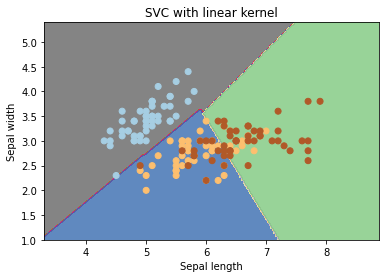

In [14]:
iris = datasets.load_iris()
X = iris.data[:,:2]
# print(X[:5])
y = iris.target


#Plot the support vectors
svc = svm.SVC(kernel='linear', C = 1, gamma='scale').fit(X,y)

#create a mesh plot
x_min, x_max = X[:, 0].min()-1, X[:,0].max()+1
y_min, y_max = X[:, 1].min()-1, X[:,1].max()+1
h = (x_max/x_min)/100
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

plt.subplot(1,1,1)
Z = svc.predict(np.c_[xx.ravel(),yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap = plt.cm.Accent_r,alpha=0.8)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with linear kernel')
plt.show()


### Non-linear hyper plane visualization using rbf ( Radial basis function) kernel

In [28]:
## Target = [0,1,2]
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [29]:
## Iris data = Two classes
# X

array([[5.1, 3.5],
       [4.9, 3. ],
       [4.7, 3.2],
       [4.6, 3.1],
       [5. , 3.6],
       [5.4, 3.9],
       [4.6, 3.4],
       [5. , 3.4],
       [4.4, 2.9],
       [4.9, 3.1],
       [5.4, 3.7],
       [4.8, 3.4],
       [4.8, 3. ],
       [4.3, 3. ],
       [5.8, 4. ],
       [5.7, 4.4],
       [5.4, 3.9],
       [5.1, 3.5],
       [5.7, 3.8],
       [5.1, 3.8],
       [5.4, 3.4],
       [5.1, 3.7],
       [4.6, 3.6],
       [5.1, 3.3],
       [4.8, 3.4],
       [5. , 3. ],
       [5. , 3.4],
       [5.2, 3.5],
       [5.2, 3.4],
       [4.7, 3.2],
       [4.8, 3.1],
       [5.4, 3.4],
       [5.2, 4.1],
       [5.5, 4.2],
       [4.9, 3.1],
       [5. , 3.2],
       [5.5, 3.5],
       [4.9, 3.6],
       [4.4, 3. ],
       [5.1, 3.4],
       [5. , 3.5],
       [4.5, 2.3],
       [4.4, 3.2],
       [5. , 3.5],
       [5.1, 3.8],
       [4.8, 3. ],
       [5.1, 3.8],
       [4.6, 3.2],
       [5.3, 3.7],
       [5. , 3.3],
       [7. , 3.2],
       [6.4, 3.2],
       [6.9,

In [31]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [32]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

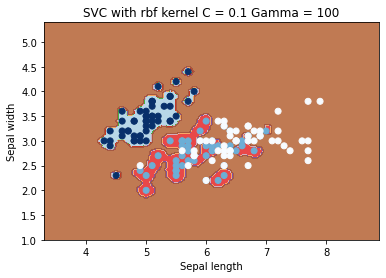

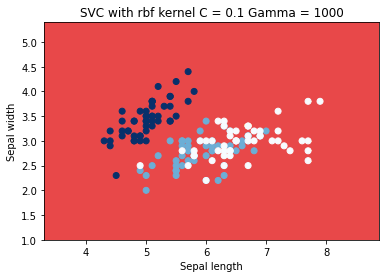

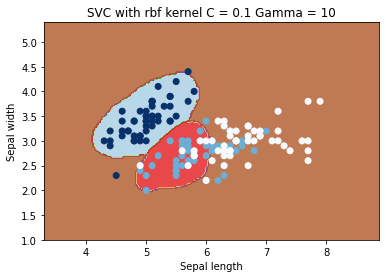

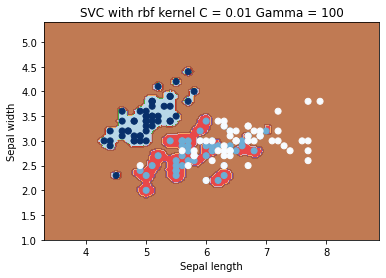

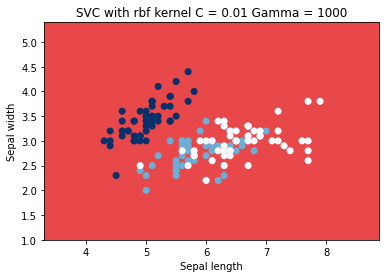

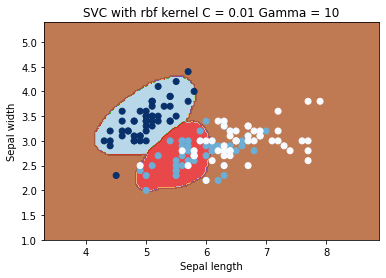

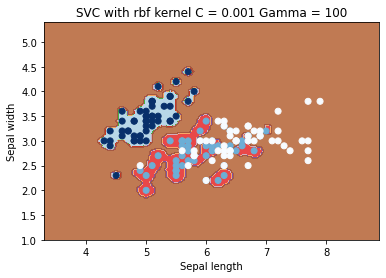

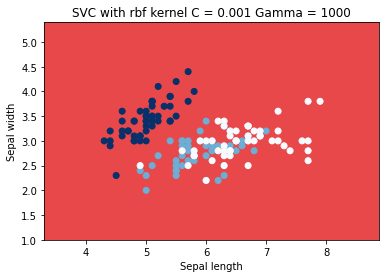

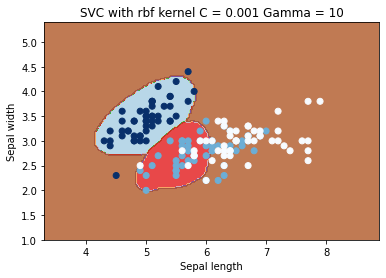

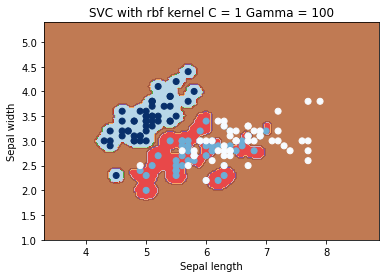

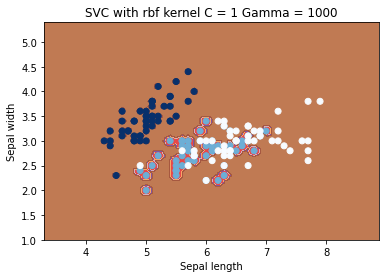

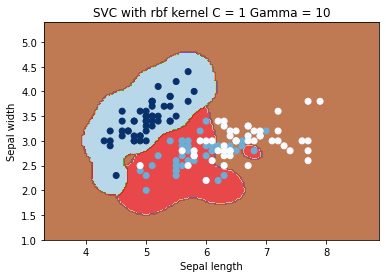

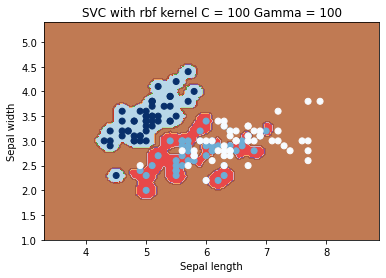

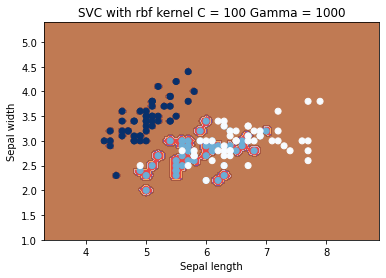

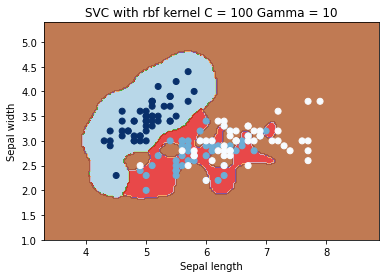

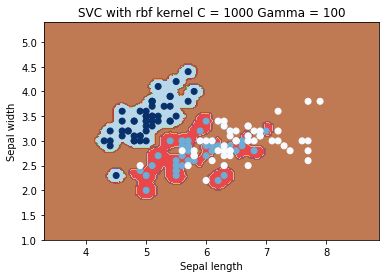

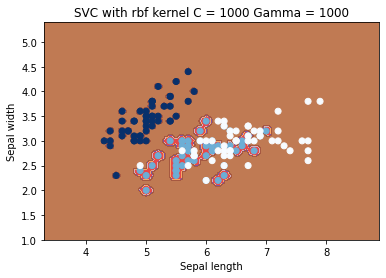

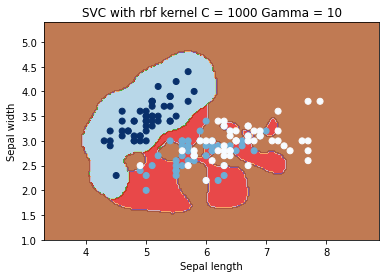

In [36]:
iris = datasets.load_iris()
X = iris.data[:,:2]
# print(X[:5])
y = iris.target


#Plot the support vectors
C = [0.1,0.01,0.001,1,100,1000]
gamma = [100,1000,10]
for i in C:
  for j in gamma:
    svc = svm.SVC(kernel='rbf', C = i, gamma=j).fit(X,y)

    #create a mesh plot
    x_min, x_max = X[:, 0].min()-1, X[:,0].max()+1
    y_min, y_max = X[:, 1].min()-1, X[:,1].max()+1
    h = (x_max/x_min)/100
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    plt.subplot(1,1,1)
    Z = svc.predict(np.c_[xx.ravel(),yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap = plt.cm.Paired,alpha=0.8)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Blues_r)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(), xx.max())
    plt.title('SVC with rbf kernel C = '+str(i)+' Gamma = '+str(j))
    plt.show()




Ref: 
* [SVM Article](https://towardsdatascience.com/support-vector-machines-svm-clearly-explained-a-python-tutorial-for-classification-problems-29c539f3ad8)
* [My favourite svm article](https://towardsdatascience.com/support-vector-machines-svm-clearly-explained-a-python-tutorial-for-classification-problems-29c539f3ad8)

> * If we have high dimensional data.
Lower values of gama and C [ie: C=1 or 0.1, gamma =10] work well. And perfectly fit.
> * We would prefer a linear hyper plane. But, there is noise and target classes are overlapping. 
> * RBF is the default kernel of choice for SVM and by sklearn svm classifier. It gives accurate results compared to linear kernel.



### Sigmoid 

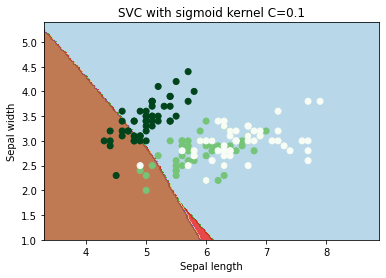

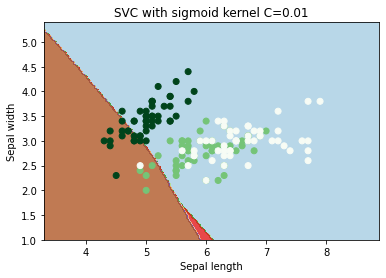

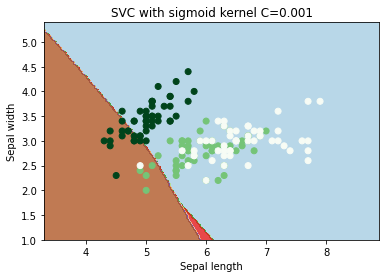

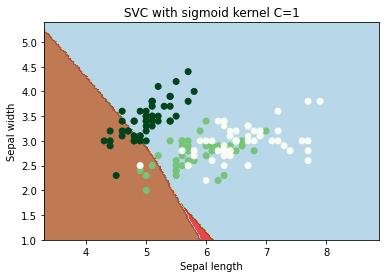

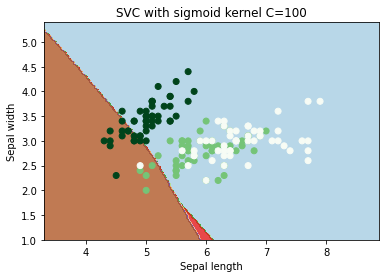

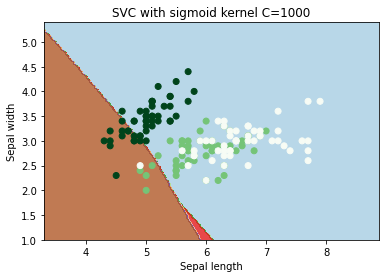

In [20]:
#https://www.analyticsvidhya.com/blog/2017/09/understaing-support-vector-machine-example-code/

iris = datasets.load_iris()
X = iris.data[:,:2]
# print(X[:5])
y = iris.target


#Plot the support vectors for different values of C
C = [0.1,0.01,0.001,1,100,1000]
for i in C:
  svc = svm.SVC(kernel='sigmoid', C = i, gamma='scale').fit(X,y)

  #create a mesh plot
  x_min, x_max = X[:, 0].min()-1, X[:,0].max()+1
  y_min, y_max = X[:, 1].min()-1, X[:,1].max()+1
  h = (x_max/x_min)/100
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

  plt.subplot(1,1,1)
  Z = svc.predict(np.c_[xx.ravel(),yy.ravel()])
  Z = Z.reshape(xx.shape)
  plt.contourf(xx, yy, Z, cmap = plt.cm.Paired,alpha=0.8)

  plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Greens_r)
  plt.xlabel('Sepal length')
  plt.ylabel('Sepal width')
  plt.xlim(xx.min(), xx.max())
  plt.title('SVC with sigmoid kernel C='+str(i))
  plt.show()


For higher values of SVC , the data gets clustered and its difficult to differentiate the features.

## Task 2: Applying LR

<pre> you will do the same thing what you have done in task 1.1, except instead of SVM you apply <a href='https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html'>logistic regression </a>

<pre>these are results we got when we are experimenting with one of the model </pre>
<img src='https://i.imgur.com/vLXTxjY.png'>

In [7]:
#you can start writing code here.


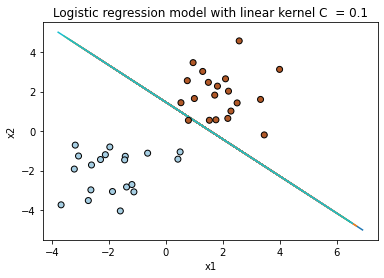

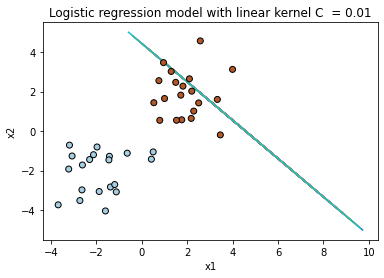

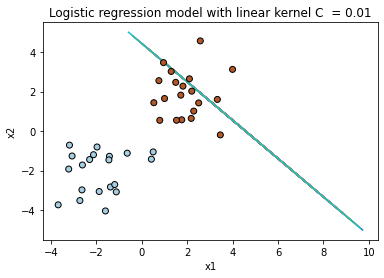

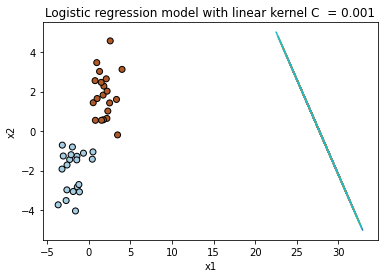

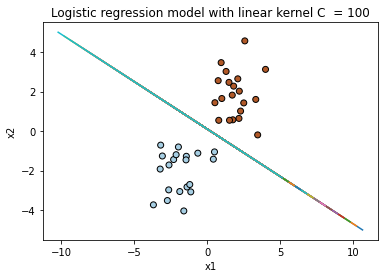

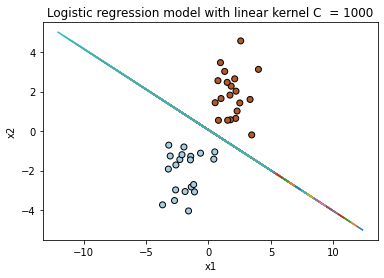

In [46]:
from sklearn.linear_model import LogisticRegression
# random distribution of 40 points
X = np.r_[np.random.randn(20,2) - [2,2],np.random.randn(20,2) + [2,2]]
Y = [0] * 20 + [1] * 20


C = [0.1,0.01,0.01,0.001,100,1000]

for j in C:

    # fit the model
    clf = LogisticRegression(C = j)
    clf.fit(X, Y)

    # hyper plane 
    w = clf.coef_[0]
    a = -w[0]/w[1]
    xx = np.linspace(-5,5)
    yy = a * xx - (clf.intercept_[0])/w[1]

    # margin = 1/np.sqrt(np.sum(clf.coef_**2))
    # yy_down = yy - np.sqrt(1 + a ** 2) * margin
    # yy_up = yy + np.sqrt(1 + a ** 2) * margin
    # plt.figure(1, figsize=(4, 3))
    # plt.clf()
    # plt.plot(xx, yy, "k-")
    # plt.plot(xx, yy_down, "k-")
    # plt.plot(xx, yy_up, "k-")
    draw_line(w,a,xx,yy)
    plt.scatter(X[:, 0], X[:, 1], c=Y, zorder=10, cmap=plt.cm.Paired,
    edgecolors="k")
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.title('Logistic regression model with linear kernel C  = '+str(j))
    plt.show()

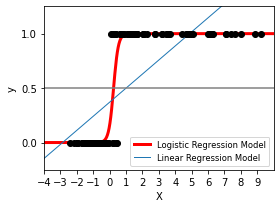

In [47]:
#https://scikit-learn.org/stable/auto_examples/linear_model/plot_logistic.html
import numpy as np
import matplotlib.pyplot as plt

from sklearn import linear_model
from scipy.special import expit
xmin, xmax = -5, 5
n_samples = 100
np.random.seed(0)
X = np.random.normal(size=n_samples)
y = (X > 0).astype(float)
X[X > 0] *= 4
X += .3 * np.random.normal(size=n_samples)

X = X[:, np.newaxis]

# Fit the classifier
clf = linear_model.LogisticRegression(C=1e5)
clf.fit(X, y)

# and plot the result
plt.figure(1, figsize=(4, 3))
plt.clf()
plt.scatter(X.ravel(), y, color='black', zorder=20)
X_test = np.linspace(-5, 10, 300)

loss = expit(X_test * clf.coef_ + clf.intercept_).ravel()
plt.plot(X_test, loss, color='red', linewidth=3)

ols = linear_model.LinearRegression()
ols.fit(X, y)
plt.plot(X_test, ols.coef_ * X_test + ols.intercept_, linewidth=1)
plt.axhline(.5, color='.5')

plt.ylabel('y')
plt.xlabel('X')
plt.xticks(range(-5, 10))
plt.yticks([0, 0.5, 1])
plt.ylim(-.25, 1.25)
plt.xlim(-4, 10)
plt.legend(('Logistic Regression Model', 'Linear Regression Model'),
           loc="lower right", fontsize='small')
plt.tight_layout()
plt.show()